In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly
import nbformat

In [2]:
stats = pd.read_csv('../Data/Players_stats2024.csv')

stats['Save% (Penalty Kicks)'] = (
    stats['Save% (Penalty Kicks)']
    .str.replace('%', '', regex=False)
    .astype(float)
)

stats['Pass Completion %'] = (
    stats['Pass Completion %']
    .str.replace('%', '', regex=False)
    .astype(float)
)

## Analyse générale

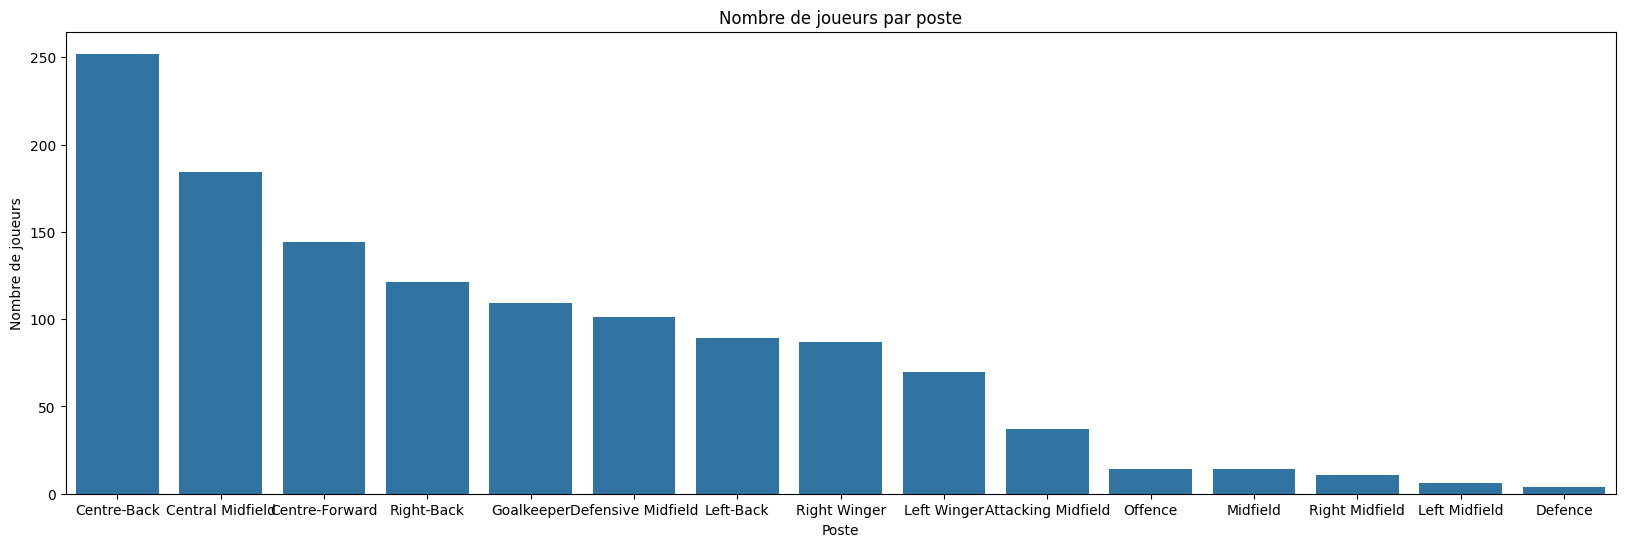

In [3]:
players_by_position = stats['poste'].value_counts().reset_index()
players_by_position.columns = ['poste', 'Count']

plt.figure(figsize=(20, 6))
sns.barplot(x='poste', y='Count', data=players_by_position)
plt.xlabel('Poste')
plt.ylabel('Nombre de joueurs')
plt.title('Nombre de joueurs par poste')
plt.show()

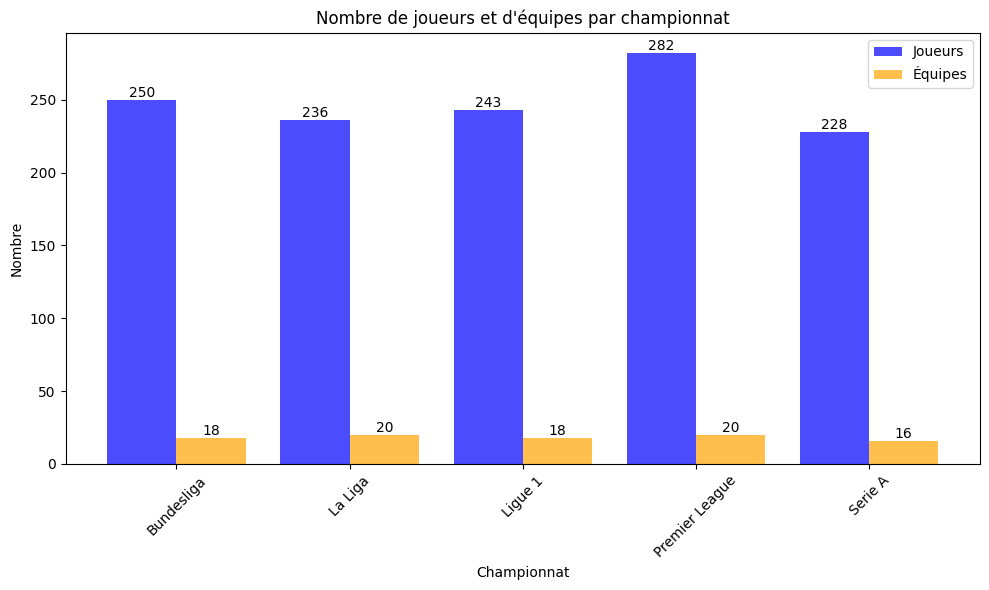

In [ ]:
joueurs_par_champ = stats.groupby('championnat')['nom'].count().reset_index()
joueurs_par_champ.columns = ['championnat', 'Nombre de joueurs']

équipes_par_champ = stats.groupby('championnat')['équipe'].nunique().reset_index()
équipes_par_champ.columns = ['championnat', 'Nombre d\'équipes']

champ_data = pd.merge(joueurs_par_champ, équipes_par_champ, on='championnat')

x = champ_data['championnat']
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x, champ_data['Nombre de joueurs'], width, label='Joueurs', color='blue', alpha=0.7)

bar2 = ax.bar([i + width for i in range(len(x))], champ_data['Nombre d\'équipes'], width, label='Équipes', color='orange', alpha=0.7)

for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Championnat')
ax.set_ylabel('Nombre')
ax.set_title('Nombre de joueurs et d\'équipes par championnat')
ax.set_xticks([i + width / 2 for i in range(len(x))])
ax.set_xticklabels(x, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

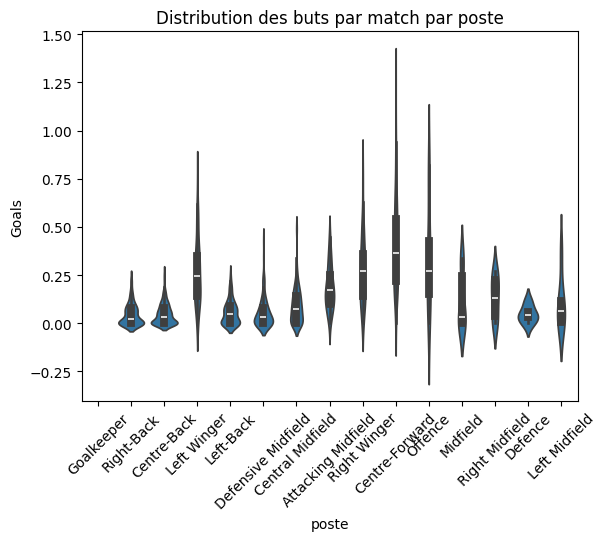

In [11]:
sns.violinplot(x='poste', y='Goals', data=stats)
plt.xticks(rotation=45)
plt.title('Distribution des buts par match par poste')
plt.show()

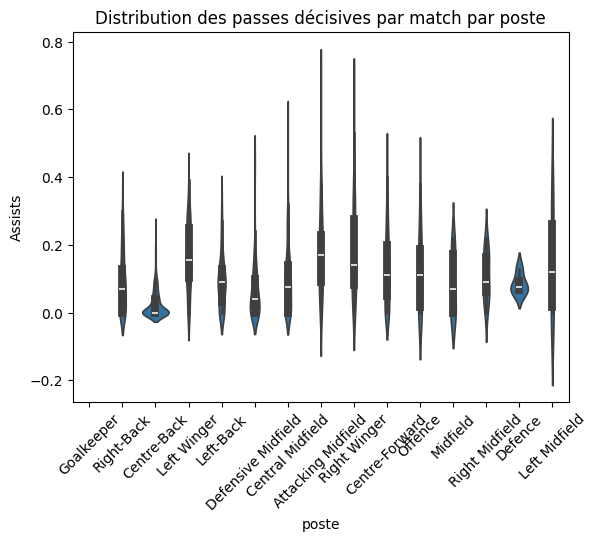

In [ ]:
sns.violinplot(x='poste', y='Assists', data=stats)
plt.xticks(rotation=45)
plt.title('Distribution des passes décisives par match par poste')
plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_14412\1324178619.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




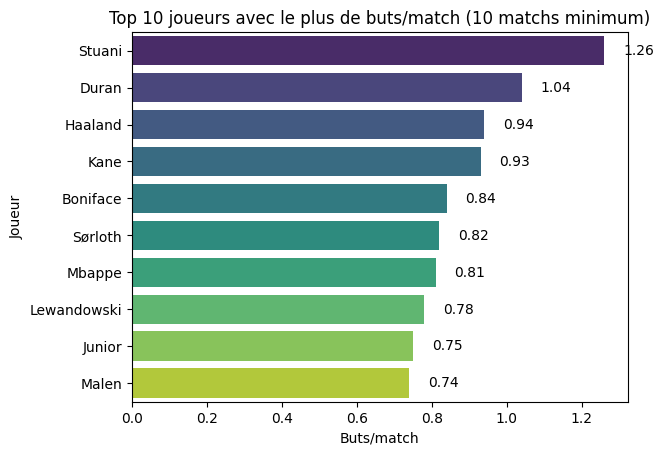

In [ ]:
filtered_stats = stats[stats['match_played'] > 10]
top_scorers = filtered_stats.nlargest(10, 'Goals')

sns.barplot(y=top_scorers['nom'], x=top_scorers['Goals'], palette='viridis')
plt.title('Top 10 joueurs avec le plus de buts/match (10 matchs minimum)')
plt.xlabel('Buts/match')
plt.ylabel('Joueur')

for index, value in enumerate(top_scorers['Goals']):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_3348\2447810603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_assists['nom'], x=top_assists['Assists'], palette='viridis')


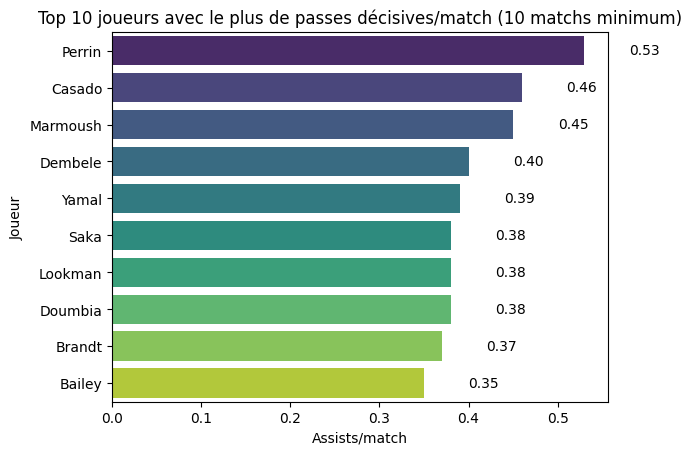

In [ ]:
filtered_stats = stats[stats['match_played'] > 10]
top_assists = filtered_stats.nlargest(10, 'Assists')

sns.barplot(y=top_assists['nom'], x=top_assists['Assists'], palette='viridis')
plt.title('Top 10 joueurs avec le plus de passes décisives/match (10 matchs minimum)')
plt.xlabel('Assists/match')
plt.ylabel('Joueur')

for index, value in enumerate(top_assists['Assists']):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.show()

C:\Users\basti\AppData\Local\Temp\ipykernel_3348\3883406157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_assists['nom'], x=top_assists['Goals Against'], palette='viridis')


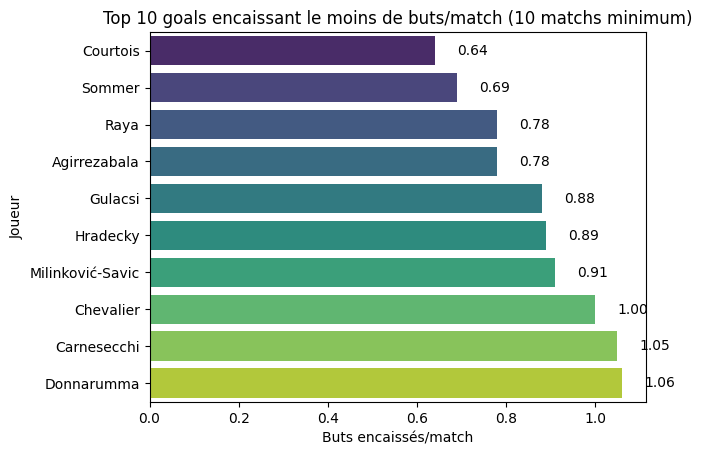

In [9]:
filtered_stats = stats[stats['match_played'] > 10]
top_assists = filtered_stats.nsmallest(10, 'Goals Against') 

sns.barplot(y=top_assists['nom'], x=top_assists['Goals Against'], palette='viridis')
plt.title('Top 10 goals encaissant le moins de buts/match (10 matchs minimum)')
plt.xlabel('Buts encaissés/match')
plt.ylabel('Joueur')

for index, value in enumerate(top_assists['Goals Against']):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.show()

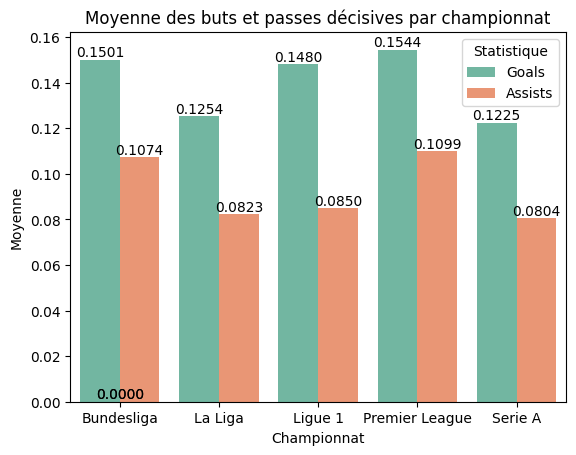

In [4]:
avg_stats = stats.groupby('championnat')[['Goals', 'Assists']].mean().reset_index()

avg_stats_melted = avg_stats.melt(id_vars='championnat', value_vars=['Goals', 'Assists'],
                                  var_name='Statistique', value_name='Moyenne')

ax = sns.barplot(data=avg_stats_melted, x='championnat', y='Moyenne', hue='Statistique', palette='Set2')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
    
plt.title('Moyenne des buts et passes décisives par championnat')
plt.xlabel('Championnat')
plt.ylabel('Moyenne')
plt.legend(title='Statistique')
plt.show()

## Analyse détaillée

In [13]:
fig = px.scatter(stats, x='Assists', y='Goals', size='match_played', color='poste',
                 hover_data=['prénom', 'nom'], title='Buts et passes décisives par match')
fig.show()

### Spécifique gardien de but

In [5]:
goalkeepers = stats[stats['poste'] == 'Goalkeeper']

avg_stats_gk = goalkeepers.groupby('championnat').mean(numeric_only=True)[['Goals Against', 'Saves', 'Save% (Penalty Kicks)', 'Clean Sheets']].reset_index()

fig = px.bar(avg_stats_gk, x='championnat', y=['Goals Against', 'Saves', 'Save% (Penalty Kicks)', 'Clean Sheets'],
             barmode='group', title='Performances des gardiens par championnat')
fig.show()

In [ ]:
fig = px.scatter(goalkeepers, x='Shots on Target Against', y='Saves', size='Goals Against', color='Goals Against',
                 hover_data=['prénom', 'nom'], title='Corrélation entre tirs cadrés subis, arrêts et buts encaissés',
                 labels={'Shots on Target Against': 'Tirs cadrés subis', 'Saves': 'Arrêts', 'Goals Against': 'Buts encaissés'})
fig.show()

In [15]:
top_goalkeepers = goalkeepers.nlargest(5, ['Clean Sheets', 'Saves'])

fig = go.Figure()

stats_columns = ['Clean Sheets', 'Saves', 'Shots on Target Against', 'Goals Against']
for _, row in top_goalkeepers.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[stats_columns],
        theta=stats_columns,
        fill='toself',
        name=row['nom']
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Comparaison des performances des meilleurs gardiens",
    showlegend=True
)

fig.show()

In [18]:
fig = px.scatter_3d(goalkeepers, 
                    x='Shots on Target Against', 
                    y='Saves', 
                    z='Goals Against',
                    color='nom', 
                    size='Clean Sheets',
                    title="Performances des gardiens (3D)",
                    labels={
                        "Shots on Target Against": "Tirs cadrés subis",
                        "Saves": "Arrêts",
                        "Goals Against": "Buts encaissés"
                    })
fig.show()

### Spécifique joueurs de champ

In [ ]:
# Comparaison entre deux joueurs spécifiques